In [1]:
#NLTK analysis

In [3]:
import numpy as np
import pandas as pd 
from pandas import DataFrame, Series
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

%matplotlib inline

In [4]:
from collections import defaultdict
import json

import scipy as sp

from matplotlib import rcParams
import matplotlib.cm as cm
import matplotlib as mpl

#colorbrewer2 Dark2 qualitative color table
dark2_colors = [(0.10588235294117647, 0.6196078431372549, 0.4666666666666667),
                (0.8509803921568627, 0.37254901960784315, 0.00784313725490196),
                (0.4588235294117647, 0.4392156862745098, 0.7019607843137254),
                (0.9058823529411765, 0.1607843137254902, 0.5411764705882353),
                (0.4, 0.6509803921568628, 0.11764705882352941),
                (0.9019607843137255, 0.6705882352941176, 0.00784313725490196),
                (0.6509803921568628, 0.4627450980392157, 0.11372549019607843)]

rcParams['figure.figsize'] = (10, 6)
rcParams['figure.dpi'] = 150
rcParams['axes.color_cycle'] = dark2_colors
rcParams['lines.linewidth'] = 2
rcParams['axes.facecolor'] = 'white'
rcParams['font.size'] = 14
rcParams['patch.edgecolor'] = 'white'
rcParams['patch.facecolor'] = dark2_colors[0]
rcParams['font.family'] = 'StixGeneral'

/home/roop/anaconda2/lib/python2.7/site-packages/matplotlib/__init__.py:913: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [5]:
#load data
sentence_df=pd.read_csv("sentence_df.csv")

In [6]:
sentence_df.columns

Index([u'Sentence', u'sentiment', u'source'], dtype='object')

In [8]:
#nltk sentiment analyzer
from nltk.sentiment.vader import SentimentIntensityAnalyzer

/home/roop/anaconda2/lib/python2.7/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [10]:
sd=SentimentIntensityAnalyzer()

In [11]:
sd.polarity_scores(sentence_df.ix[0,'Sentence'])

/home/roop/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  if __name__ == '__main__':


{'compound': -0.4215, 'neg': 0.219, 'neu': 0.781, 'pos': 0.0}

In [13]:
type(sd.polarity_scores(sentence_df.ix[0,'Sentence']))

dict

In [15]:
n=sentence_df.shape[0]
sentence_df['predicted_sentiment']=0
for i in range(n):
    pol_dict=sd.polarity_scores(sentence_df.ix[i,'Sentence'])
    if pol_dict['neg']>pol_dict['pos']:
        sentence_df.ix[i,'predicted_sentiment']=-1
    if pol_dict['neg']<pol_dict['pos']:
        sentence_df.ix[i,'predicted_sentiment']=1
    if pol_dict['neg']==pol_dict['pos']:
        sentence_df.ix[i,'predicted_sentiment']=0        

In [16]:
sentence_df['predicted_sentiment'].value_counts()

 1    1354
 0     871
-1     775
Name: predicted_sentiment, dtype: int64

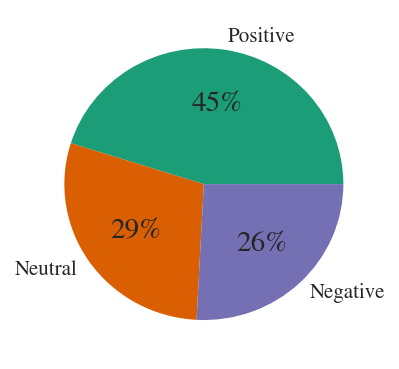

In [21]:
plt.figure(figsize=(3,3))
plt.pie(sentence_df['predicted_sentiment'].value_counts(),labels=['Positive','Neutral','Negative'],autopct='%1.0f%%')
plt.show()